### MLDA@EEE Deep Learning Week Special:
# **Text Generator using RNN**

This notebook is part of MLDA@EEE's series of workshops during the Deep Learning week.

Designed to run in Google Colab.



In this workshop, we assumed that you have attended the workshops in pre-deep learning week and have basic knowledge of **Python** programming, **deep learning** as well as **neural network** Basics.
If not, don't worry, as you will be instructed step by step in this pratical session to apply what you learnt during the tutorial session. If you encounter any technical issues or need assistance from us, you can ask us in the ZOOM chat and a helper will come to you as soon as possible.

The structure of this pratical session is listed below:
1. Text Processing Basics
2. RNN Building Basics
3. Lyrics Generator
4. Shakespeare Generator


### **Connect to GPU instance (Recommend)**
To connect to GPU instance on Google Colab, follow the instruction below

Edit > Notebook settings > Hardware accelerator > GPU

## **1. Text Processing Basics**

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation.

To give you a more intuitive perspective, we will start with a short file 'eee-overview.txt' and do some practices on text processing basics first.

In [ ]:
# download 'eee-overview.txt' file
!wget https://ycrao573.github.io/rnn-workshop/eee-overview.txt

--2020-09-29 10:33:44--  https://ycrao573.github.io/rnn-workshop/eee-overview.txt
Resolving ycrao573.github.io (ycrao573.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to ycrao573.github.io (ycrao573.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3336 (3.3K) [text/plain]
Saving to: ‘eee-overview.txt’

eee-overview.txt    100%[===================>]   3.26K  --.-KB/s    in 0s      

2020-09-29 10:33:44 (43.1 MB/s) - ‘eee-overview.txt’ saved [3336/3336]



In [ ]:
overview = open('eee-overview.txt', 'r').read()
# length of text is the number of characters in it
print('Length of text: {} characters'.format(len(overview)))
print('First 100 characters: \n', overview[:100])

Length of text: 3322 characters
First 100 characters: 
 The School of Electrical and Electronic Engineering (NTU EEE) began as one of the three founding sch


In [ ]:
# The unique characters in the file
vocab = sorted(set(overview))
print ('{} unique characters'.format(len(vocab)))

68 unique characters


In [ ]:
stopChars = [',','(',')','.','-','[',']','"','/','&','!','\'','?']
corpus = overview.replace('\n', ' ').replace('\t',' ').lower()
for char in stopChars:
  corpus = corpus.replace(char, '')
corpus = corpus.replace('  ', ' ')
print(corpus[:100])

the school of electrical and electronic engineering ntu eee began as one of the three founding schoo


In [ ]:
corpus_words = [i for i in corpus.split() if i]
corpus_words[:5]

['the', 'school', 'of', 'electrical', 'and']

In [ ]:
map(str.strip, corpus_words)
vocab = sorted(set(corpus_words))
print('Corpus length (in words):', len(corpus_words))
print('Unique words in corpus: {}'.format(len(vocab)))

Corpus length (in words): 482
Unique words in corpus: 257


In [ ]:
s = 'the school of electrical and electronic engineering ntu eee began as one of the three'
word2idx = {u: i for i, u in enumerate(vocab)}
print(word2idx)
[word2idx[i] for i in s.split()]

{'$90': 0, '1000': 1, '11th': 2, '13': 3, '150': 4, '194': 5, '1985': 6, '1999': 7, '20': 8, '20000': 9, '2011': 10, '2017': 11, '2020': 12, '21': 13, '300': 14, '3000': 15, '4': 16, '50': 17, '6th': 18, '7th': 19, '9': 20, 'a': 21, 'about': 22, 'academic': 23, 'active': 24, 'activities': 25, 'administrative': 26, 'advanced': 27, 'ahead': 28, 'all': 29, 'also': 30, 'alumni': 31, 'ambitions': 32, 'an': 33, 'analytics': 34, 'and': 35, 'annualised': 36, 'aoba': 37, 'apart': 38, 'are': 39, 'areas': 40, 'around': 41, 'artificial': 42, 'as': 43, 'asian': 44, 'autonomous': 45, 'average': 46, 'backed': 47, 'backgrounds': 48, 'batch': 49, 'become': 50, 'began': 51, 'being': 52, 'besides': 53, 'big': 54, 'biomedical': 55, 'both': 56, 'broad': 57, 'by': 58, 'centre': 59, 'centres': 60, 'challenges': 61, 'close': 62, 'closely': 63, 'collaborations': 64, 'communications': 65, 'companies': 66, 'competent': 67, 'consistently': 68, 'consists': 69, 'continues': 70, 'corporate': 71, 'counting': 72, 'cou

[221, 185, 153, 85, 35, 86, 90, 150, 83, 51, 43, 156, 153, 221, 228]

Now, we will introduce tensorflow library so that we can process our text with higher quality and efficiency.

Let's start with tokenization:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = [
    'I love coffee',
    'I do not like tea.',
    'We all love MLDA!'
]
tokenizer = Tokenizer(num_words = 32)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('word_index: ', word_index)
test_sen = [
    'I like coffee...',
    'You really love tea',
    'We love MLDA!'
]
test_seq = tokenizer.texts_to_sequences(test_sen)
print(test_seq)

word_index:  {'i': 1, 'love': 2, 'coffee': 3, 'do': 4, 'not': 5, 'like': 6, 'tea': 7, 'we': 8, 'all': 9, 'mlda': 10}
[[1, 6, 3], [2, 7], [8, 2, 10]]


We may also consider adding oov_token. Keras lets us define an Out Of Vocab token - this will replace any unknown words with a token of our choosing. This is better than just throwing away unknown words since it tells our model there was information here.

In [ ]:
tokenizer = Tokenizer(num_words = 32, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('word_index: ', word_index)
sequences = tokenizer.texts_to_sequences(sentences)
test_sen = [
    'I like coffee.',
    'You really love tea',
    'We all love MLDA!'
]
test_seq = tokenizer.texts_to_sequences(test_sen)
print(test_seq)

word_index:  {'<OOV>': 1, 'i': 2, 'love': 3, 'coffee': 4, 'do': 5, 'not': 6, 'like': 7, 'tea': 8, 'we': 9, 'all': 10, 'mlda': 11}
[[2, 7, 4], [1, 1, 3, 8], [9, 10, 3, 11]]


All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 32, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=8)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'i': 2, 'love': 3, 'coffee': 4, 'do': 5, 'not': 6, 'like': 7, 'tea': 8, 'we': 9, 'all': 10, 'mlda': 11}
[[2, 3, 4], [2, 5, 6, 7, 8], [9, 10, 3, 11]]
[[ 0  0  0  0  0  2  3  4]
 [ 0  0  0  2  5  6  7  8]
 [ 0  0  0  0  9 10  3 11]]


## **2. RNN Building Basics**

**Recurrent neural networks (RNN)** are a class of neural networks that is powerful for modeling sequence data such as time series or natural language. Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The **Keras RNN API** is designed with a focus on:


*   Ease of use: the built-in keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

*   **Ease of customization**: You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic keras.layers.RNN layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.

For more information about building RNN in keras, please visit TensorFlow official documentation [here](https://www.tensorflow.org/guide/keras/rnn)

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

tokenizer = Tokenizer()

corpus = open('eee-overview.txt', 'r').read()
corpus = overview.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 32, input_length=max_sequence_len-1))
model.add(SimpleRNN(32))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_history = model.fit(xs, ys, epochs=100, verbose=1)

In [ ]:
seed_text = "eee is"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

## **3. Lyrics Generator (Word Tokenization)**

This tutorial demonstate how to generator text based on given text using word tokenization and RNN. The text containing the song titles and the lyrics of many famous songs of Beatles (credit: [petrosDemetrakopoulos](https://github.com/petrosDemetrakopoulos/)). So, given a sequence of words from Beatles lyrics, it can predict the next words.





<img src = "https://miro.medium.com/max/2560/0*SUipu9efyQeKHdlk." width = 70%>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

!wget https://ycrao573.github.io/rnn-workshop/lyrics.txt

--2020-10-02 10:55:20--  https://ycrao573.github.io/rnn-workshop/lyrics.txt
Resolving ycrao573.github.io (ycrao573.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to ycrao573.github.io (ycrao573.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245890 (240K) [text/plain]
Saving to: ‘lyrics.txt’

lyrics.txt          100%[===================>] 240.13K  --.-KB/s    in 0.03s   

2020-10-02 10:55:20 (8.06 MB/s) - ‘lyrics.txt’ saved [245890/245890]



In [ ]:
text = open('lyrics.txt', 'r').read()
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))
print(text[:250])

In [ ]:
tokenizer = Tokenizer()

corpus = text.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'the': 3, 'me': 4, 'to': 5, 'and': 6, 'a': 7, 'love': 8, 'my': 9, 'in': 10, 'be': 11, 'that': 12, "don't": 13, 'it': 14, 'do': 15, 'all': 16, "i'm": 17, 'on': 18, 'your': 19, 'of': 20, 'is': 21, 'oh': 22, 'know': 23, 'so': 24, 'she': 25, "it's": 26, 'for': 27, 'when': 28, 'baby': 29, 'can': 30, 'but': 31, 'now': 32, 'her': 33, 'well': 34, 'no': 35, 'if': 36, 'got': 37, 'what': 38, 'with': 39, 'want': 40, 'just': 41, 'see': 42, 'come': 43, 'say': 44, 'like': 45, 'one': 46, "you're": 47, "i'll": 48, 'girl': 49, 'yeah': 50, 'gonna': 51, 'little': 52, 'get': 53, 'go': 54, 'down': 55, 'will': 56, 'time': 57, "she's": 58, 'let': 59, 'never': 60, 'tell': 61, 'was': 62, 'day': 63, 'said': 64, 'yeh': 65, 'back': 66, 'we': 67, 'they': 68, 'how': 69, 'there': 70, 'way': 71, "can't": 72, 'make': 73, 'man': 74, 'good': 75, 'have': 76, 'over': 77, "i've": 78, 'here': 79, 'are': 80, 'long': 81, 'not': 82, 'he': 83, 'up': 84, 'hey': 85, 'as': 86, "that's": 87, 'night': 88, 'take': 8

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len = 33
# pad sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, labels = input_sequences[:,:-1],input_sequences[:,-1]
label = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 32, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 32)            100896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_2 (Dense)              (None, 3153)              406737    
Total params: 557,297
Trainable params: 557,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(predictors, label, epochs=20, verbose=1)

Epoch 1/20
1290/1290 [==============================] - 12s 9ms/step - loss: 6.1132 - accuracy: 0.0479
Epoch 2/20
1290/1290 [==============================] - 12s 9ms/step - loss: 5.6542 - accuracy: 0.0642
Epoch 3/20
1290/1290 [==============================] - 12s 9ms/step - loss: 5.2818 - accuracy: 0.0945
Epoch 4/20
1290/1290 [==============================] - 12s 9ms/step - loss: 4.9630 - accuracy: 0.1246
Epoch 5/20
1290/1290 [==============================] - 11s 9ms/step - loss: 4.6903 - accuracy: 0.1540
Epoch 6/20
1290/1290 [==============================] - 12s 9ms/step - loss: 4.4470 - accuracy: 0.1782
Epoch 7/20
1290/1290 [==============================] - 12s 9ms/step - loss: 4.2131 - accuracy: 0.2045
Epoch 8/20
1290/1290 [==============================] - 11s 9ms/step - loss: 3.9970 - accuracy: 0.2321
Epoch 9/20
1290/1290 [==============================] - 11s 9ms/step - loss: 3.7910 - accuracy: 0.2601
Epoch 10/20
1290/1290 [==============================] - 11s 9ms/step - l

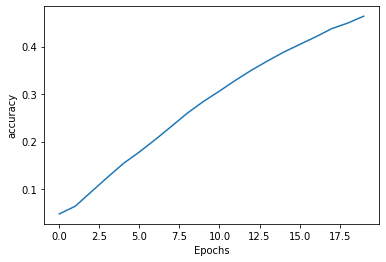

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "One day"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
One day the wind will blow it and you know that you


## **4. Shakespeare Generator (Character Tokenization)**

This tutorial demonstrates how to generate text using a character-based RNN. We will work with a dataset of Shakespeare's writing from Andrej Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks. Given a sequence of characters from this data ("Shakespear"), train a model to predict the next character in the sequence ("e"). Longer sequences of text can be generated by calling the model repeatedly.

In [ ]:
import tensorflow as tf
import numpy as np
import time
#Download the dataset
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
                                       'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
#Explore the data
text = open(path_to_file, 'r').read()
print(text[:100])

1122304/1115394 [==============================] - 0s 0us/step
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

65 unique characters


In [ ]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])
for char,_ in zip(char2idx, range(5)):
    print(repr(char), ':', char2idx[char])

'\n' : 0
' ' : 1
'!' : 2
'$' : 3
'&' : 4


In [ ]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text
dataset = sequences.map(split_input_target)

In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [ ]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
lstm_7 (LSTM)                (64, None, 1024)          5246976   
_________________________________________________________________
dense_9 (Dense)              (64, None, 65)            66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [ ]:
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [ ]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

history = model.fit(dataset, epochs=5, callbacks=[checkpoint_callback], verbose=1)

Epoch 1/5
172/172 [==============================] - 13s 75ms/step - loss: 2.5718 - accuracy: 0.2932
Epoch 2/5
172/172 [==============================] - 13s 76ms/step - loss: 1.8794 - accuracy: 0.4495
Epoch 3/5
172/172 [==============================] - 13s 76ms/step - loss: 1.6341 - accuracy: 0.5154
Epoch 4/5
172/172 [==============================] - 13s 74ms/step - loss: 1.5018 - accuracy: 0.5507
Epoch 5/5
172/172 [==============================] - 13s 74ms/step - loss: 1.4216 - accuracy: 0.5710


In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
    predictions = model(input_eval)
    # remove the batch dimension
    predictions = tf.squeeze(predictions, 0)

    # using a categorical distribution to predict the character returned by the model
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # We pass the predicted character as the next input to the model
    # along with the previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string="Lord: "))

Lord: what seturn
To the on in law, that was with you.

Nurse:
Let's that I'll wast too got.

BRUTUS:
What, more am yours;
Fray not to do.

EORWER:
It is their fire exposed as mound my sons,
And here be your hims, look lords and the fire of 3.

KING RICHARD III:
What to sitk a life, that, trust is distortuce.

First Citizen:
I must not, see mire, you mid confure to maid;
Ay, his false be-not being needy relight
Not when arr soul rubwing should by agging.
New well aid to purpated in your breasty.

DUKE VINCENTIO:
Bear him a rather, cry?

Nurse:
Lady you'll kissing a face of the deecherous cloud:
When: are not risp truth to be married to shine be stays,
Or do king, if all those gated to his:
Away!

PRONCEY:
Is think not for my passy. If he come
To call him my life: I pray, sin, if we may beed;
And for winess till her weetifaticnes.
Or she is a morrowning too majier,
I resed the glit war to doober with theem: that he litesgep shel;
I thank first seeate be happy take:
We mus revented the b

## **(Optional) Text Generation using GPT-2 Transformer**

OpenAI GPT-2 model was proposed in Language Models are Unsupervised Multitask Learners by Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei and Ilya Sutskever. It’s a causal (unidirectional) transformer pretrained using language modeling on a very large corpus of ~40 GB of text data.

GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.

Here, we will use a lighter version, [GPT-2 Medium Model](https://huggingface.co/gpt2-medium) for your convenience and demo purpose.

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.8MB/s 
     |████████████████████████████████| 3.0MB 16.8MB/s 
     |████████████████████████████████| 1.1MB 26.3MB/s 
     |████████████████████████████████| 890kB 31.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=9e1e7ded16999ddde81b7a889f1f78056cdc54edb46e4d484051ce3fefa1f9a2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer, GPT2Config

In [ ]:
model_name = "gpt2-medium"
config = GPT2Config.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gptmodel = TFGPT2LMHeadModel.from_pretrained(model_name, config=config)

All model checkpoint weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-medium.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
from transformers import set_seed
set_seed(12)

In [ ]:
input_ids = tokenizer.encode('I love machine learning and data analytics,', return_tensors='tf')
input_ids

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[   40,  1842,  4572,  4673,   290,  1366, 23696,    11]],
      dtype=int32)>

In [ ]:
output = gptmodel.generate(input_ids, max_length=15)
print('Output:\n')
print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:

I love machine learning and data analytics, but I'm not a big fan


In [ ]:
sample_outputs = gptmodel.generate(
    input_ids,
    do_sample=True,
    max_length=30,
    top_k=50,
    top_p=0.95,
    num_return_sequences=8
)

for i, sample_output in enumerate(sample_outputs):
  
  print("{}: {}".format(i, tokenizer.decode(sample_output)))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


0: I love machine learning and data analytics, so I was excited to learn about R. My first thought was that R would be easier to learn than SQL
1: I love machine learning and data analytics, but it's also really hard to put those skills together in a single class," says Kipnis, "
2: I love machine learning and data analytics, but most of all this machine learning is the most exciting and helpful for humans to understand. In other words,
3: I love machine learning and data analytics, but I'm going to keep it to myself for now. Now, lets discuss some of the key aspects that
4: I love machine learning and data analytics, but the software I use is not something you use to build a big machine like Google. So I'm not
5: I love machine learning and data analytics, but I don't care how it works. I am concerned about making data intelligently representable. Here's
6: I love machine learning and data analytics, especially the ones based on machine learning. And I love building things myself usin